# W207.6 Final Project on Housing Price Predictions 

Lee Moore & Paul Petit

Link to our project proposal: https://colab.research.google.com/drive/14nNfLZx_k-AgQkbP_Br5JxTUM_p0H38_#scrollTo=5lBt6CXmpvxU

# 1 Load Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.dummy import DummyRegressor

#ignore useless warnings
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

Using TensorFlow backend.


# 2 Load Data

via Github: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [2]:
# Set the randomizer seed so results are the same each time.
np.random.seed(0)

#import train data from Github
url = 'https://raw.githubusercontent.com/leebean337/housing/master/train.csv'
train = pd.read_csv(url)

print(f"Original training data examples = {train.shape[0]}, columns= {train.shape[1]}")

Original training data examples = 1460, columns= 81


# 3 Exploratory Analysis

## 3.1 Variable categorization

Below we have a list of all the variables in our data set as provided by Kaggle. We grouped the variables into a hierarchical intuitive structure.

**OUTCOME VARIABLE**
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

**EXPLANATORY VARIABLES**
* **Building Class and Zoning Variables**
 * MSSubClass: The building class
 * BldgType: Type of dwelling
 * HouseStyle: Style of dwelling
 
* **Location variables**
  * Neighborhood: Physical locations within Ames city limits
  * MSZoning: The general zoning classification

* **Lot Variables**
 * LotFrontage: Linear feet of street connected to property
 * LotArea: Lot size in square feet
 * LotShape: General shape of property
 * LotConfig: Lot configuration
 * Street: Type of road access
 * Alley: Type of alley access
 * LandContour: Flatness of the property
 * LandSlope: Slope of property
 * Condition1: Proximity to main road or railroad
 * Condition2: Proximity to main road or railroad (if a second is present)

* **Building Features**
 * Feature details
   * Utilities: Type of utilities available
   * RoofStyle: Type of roof
   * RoofMatl: Roof material
   * Exterior1st: Exterior covering on house
   * Exterior2nd: Exterior covering on house (if more than one material)
   * MasVnrType: Masonry veneer type
   * Foundation: Type of foundation
   * BsmtExposure: Walkout or garden level basement walls
   * Heating: Type of heating
   * CentralAir: Central air conditioning
   * Electrical: Electrical system
   * BsmtFullBath: Basement full bathrooms
   * BsmtHalfBath: Basement half bathrooms
   * FullBath: Full bathrooms above grade
   * HalfBath: Half baths above grade
   * BedroomAbvGr: Number of bedrooms above basement level
   * KitchenAbvGr: Number of kitchens
   * TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
   * Fireplaces: Number of fireplaces
   * GarageType: Garage location
   * GarageFinish: Interior finish of the garage
   * GarageCars: Size of garage in car capacity
   * PavedDrive: Paved driveway
   * MiscFeature: Miscellaneous feature not covered in other categories
   * MiscVal: $Value of miscellaneous feature 
   * Functional: Home functionality rating
 * Feature quality & condition
   * OverallQual: Overall material and finish quality
   * OverallCond: Overall condition rating
   * ExterQual: Exterior material quality
   * ExterCond: Present condition of the material on the exterior
   * BsmtQual: Height of the basement
   * BsmtCond: General condition of the basement
   * BsmtFinType1: Quality of basement finished area
   * BsmtFinType2: Quality of second finished area (if present)
   * HeatingQC: Heating quality and condition
   * KitchenQual: Kitchen quality
   * FireplaceQu: Fireplace quality
   * PoolQC: Pool quality
   * Fence: Fence quality
   * GarageQual: Garage quality
   * GarageCond: Garage condition
 * Feature square footage
   * MasVnrArea: Masonry veneer area in square feet
   * BsmtFinSF1: Type 1 finished square feet
   * BsmtFinSF2: Type 2 finished square feet
   * BsmtUnfSF: Unfinished square feet of basement area
   * TotalBsmtSF: Total square feet of basement area
   * 1stFlrSF: First Floor square feet
   * 2ndFlrSF: Second floor square feet
   * LowQualFinSF: Low quality finished square feet (all floors)
   * GrLivArea: Above grade (ground) living area square feet
   * WoodDeckSF: Wood deck area in square feet
   * OpenPorchSF: Open porch area in square feet
   * EnclosedPorch: Enclosed porch area in square feet
   * 3SsnPorch: Three season porch area in square feet
   * ScreenPorch: Screen porch area in square feet
   * PoolArea: Pool area in square feet
   * GarageArea: Size of garage in square feet
* **Sale Variables**
  * MoSold: Month Sold
  * YrSold: Year Sold
  * SaleType: Type of sale
  * SaleCondition: Condition of sale
* **Build Date Features**
  * YearBuilt: Original construction date
  * YearRemodAdd: Remodel date
  * GarageYrBlt: Year garage was built


## 3.2 Data Discovery and Visualization

In [0]:
#Examine data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The first 5 records, 5 properties and the values for their various features 81 features

In [0]:
#descriptive statistics on numerical data (no unexpected values at first glance)
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Key statistics for the numerical (non-categorical) variables in our data set. Gives us a first glance at where we'll see missing values, which we'll have to impute later.

In [0]:
print("Number of features: ", len(train.columns))

Number of features:  81


## 3.3 Variable Categorization

To help us further explore our data and later examine the effect of training our models on various sets of features, we'll organize the full set of features we have into various packages defined in different technical or intuitive ways. 

### 3.3.1 Features Packages

#### Categorical vs. Continuous and Discrete Numeric Features

In [0]:
# Categorical variables: variables for which the value type in our train data is 'object' (as opposed to float or int)
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                        'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']

# Continuous numeric features: variables for which the value type in our train data is a float or an int with more than several possible values
continuous_numeric_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                               'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                               '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# Discrete numeric features: variables for which the value type in our train data is a float or an int with just several possible values
discrete_numeric_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath',
                             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                             'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold',
                             'YrSold']

numeric_features = continuous_numeric_features + discrete_numeric_features
all_features = categorical_features + numeric_features

#### General Building Features by Feature Class

Feature classes are eg. quality and condition features, square footage features, etc.

In [0]:
# Building class features
building_class_features = ['MSSubClass', 'BldgType', 'HouseStyle']

# Building location features
building_location_features = ['MSZoning', 'Neighborhood']

# Building lot features
building_lot_features = ['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Street', 
                         'Alley', 'LandContour', 'LandSlope', 'Condition1', 'Condition2']

# Building feature details
building_features_detail = ['Utilities', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
                            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
                            'GarageFinish', 'GarageCars', 'PavedDrive', 'MiscFeature', 'MiscVal',
                            'Functional']

# Building feature quality and condition features
building_features_qc = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
                        'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                        'FireplaceQu', 'PoolQC', 'Fence', 'GarageQual', 'GarageCond']

# Building square footage features
building_features_sqft = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
                          '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'GarageArea']

# building age features
building_age_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

# All building feature details
building_features_detail_all = building_features_detail + building_features_qc + building_features_sqft

# All building feature details with class, class, location, and lot features as well
building_features = building_class_features + building_location_features + building_lot_features + building_age_features + building_features_detail_all

# sale variables
building_sale_features = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

#### General Building Features by Feature Type

Feature type are eg. bedrooms, bathrooms, garage, basement, etc.

Please note, this package does not contain a set of features that are  mutually exclusive and collectively exhaustive.

In [0]:
# building features components
building_features_bedrooms = ['BedroomAbvGr', 'TotRmsAbvGrd']
building_features_bathrooms = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
building_features_sf_flr = ['1stFlrSF', '2ndFlrSF']
building_features_garage = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
                            'GarageArea']
building_features_basement = ['BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 
                              'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']
building_features_kitchen = ['KitchenAbvGr', 'KitchenQual']
building_features_deck = ['WoodDeckSF']
building_features_porch = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
building_features_pool = ['PoolQC', 'PoolArea']
building_features_exterior_misc = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
                                   'PavedDrive', 'MasVnrType', 'MasVnrArea']
building_features_interior_misc = ['Utilities', 'BsmtExposure','Heating', 'CentralAir', 'Electrical',
                                   'Fireplaces']

# building features feature sets
building_features_interior = building_features_bedrooms + building_features_bathrooms + building_features_sf_flr + building_features_garage + building_features_basement + building_features_kitchen + building_features_interior_misc
building_features_exterior = building_features_deck + building_features_porch + building_features_pool + building_features_exterior_misc

## 3.4 Data Visualization

Before we plot, we'll define functions that will make this easier below.

In [0]:
# Set up plot with len(package) subplots (maybe made into a square)
# Plot a countplot using seaborn with dataframe = train and x = package_item and ax = first item in axes list
def count_plot(package):    
    axes = []
    for i, f in enumerate(package):
#         cols = 3
#         if len(package) % cols == 0:
#             rows = (len(package) // cols)
#         else: 
#             rows = (len(package) // cols) + 1
        fig, ax = plt.subplots()
        axes.append(ax)
        if train[f].dtype in ['int64', 'int32', 'float']:
            axes[i].set_title('Histogram of ' + str(f))
            sns.distplot(train[f][train[f].notnull()], ax=axes[i])
        elif len(train[f].unique()) > 12:
            axes[i].set_title('Bar Plot of ' + str(f))
            sns.countplot(y=f, data=train, ax=axes[i], orient='h')
        else: 
            axes[i].set_title('Bar Plot of ' + str(f))
            sns.countplot(x=f, data=train, ax=axes[i], orient='v')
    plt.show()

We'll examine our data by feature class, a package that is mutually exclusive and collectively exhaustive and lends itself well to variable sets that are of similar data type. 

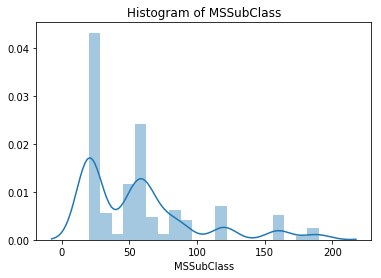

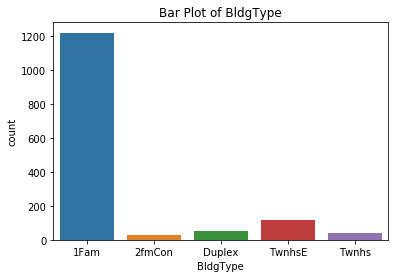

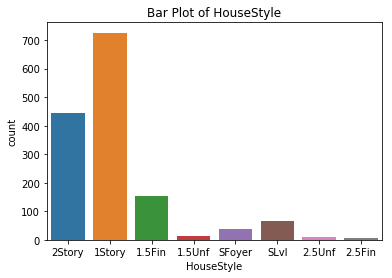

In [0]:
count_plot(building_class_features)

Note that most buildings are single family, 1- and 2-story houses.

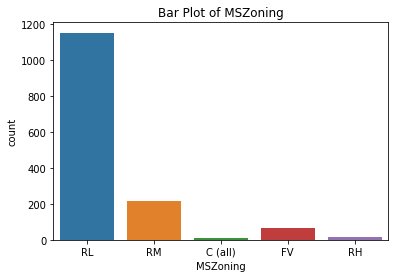

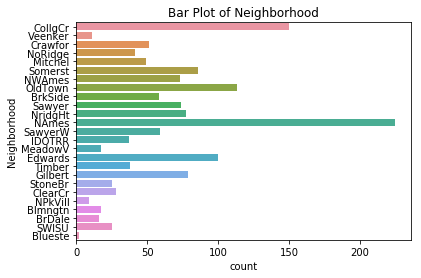

In [0]:
count_plot(building_location_features)

Note that most houses are in NAmes and CollgCr.

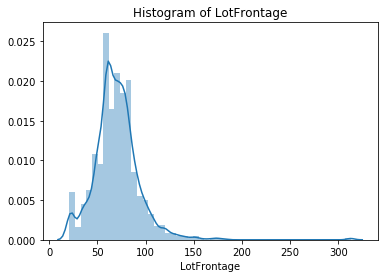

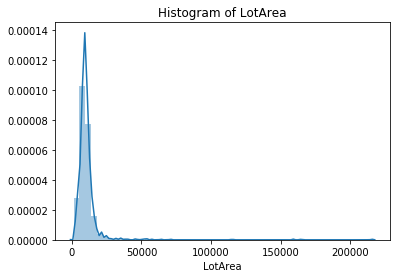

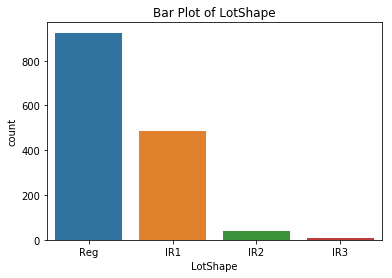

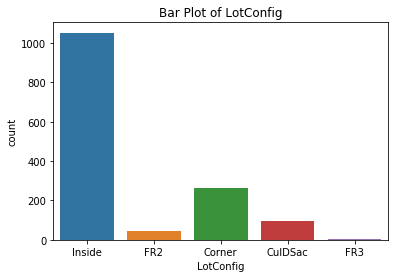

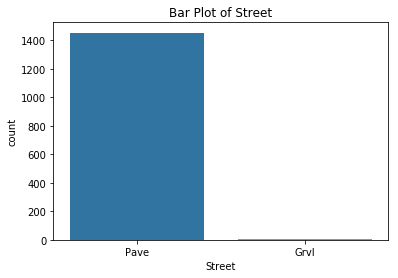

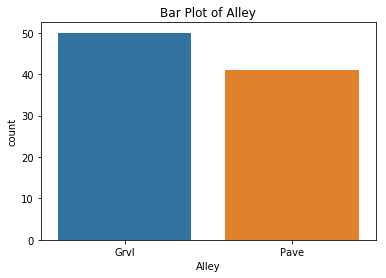

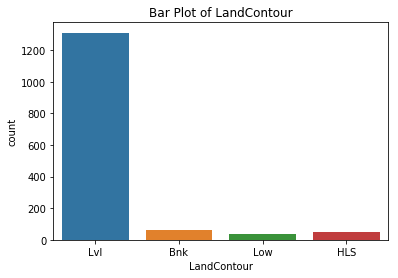

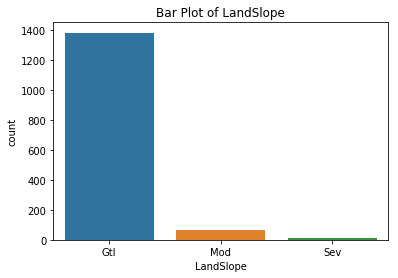

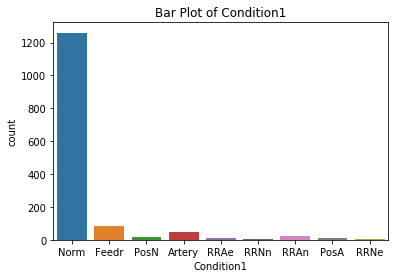

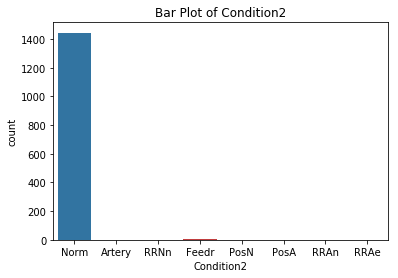

In [0]:
count_plot(building_lot_features)

Our continuous variables here clost to normally distributed with a skew to the right which may count in favor of transforming them with a log. The lion share of houses on paved roads and have normal lot properties and a gentle slope which is likely strongly correlated with them being level as well.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


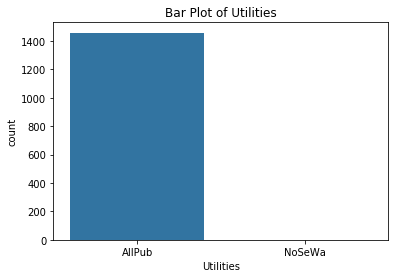

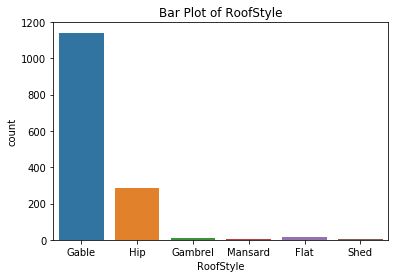

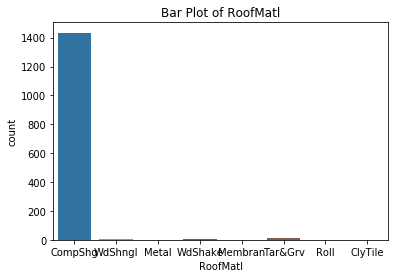

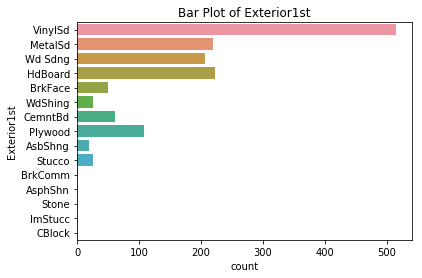

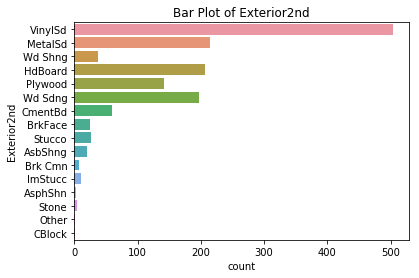

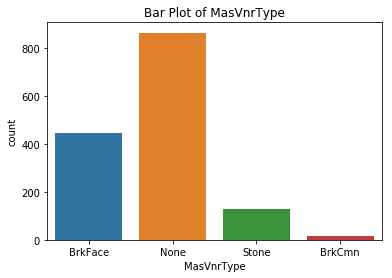

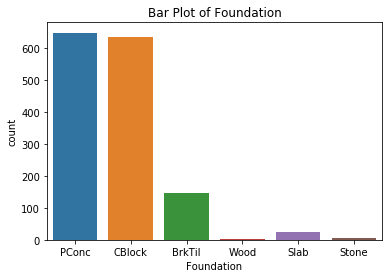

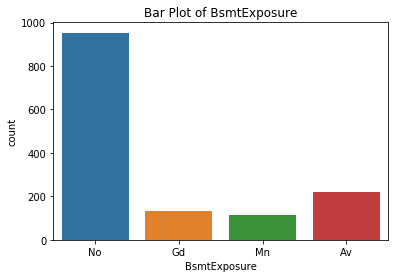

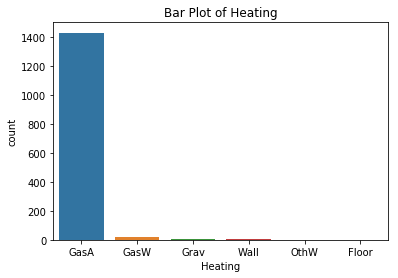

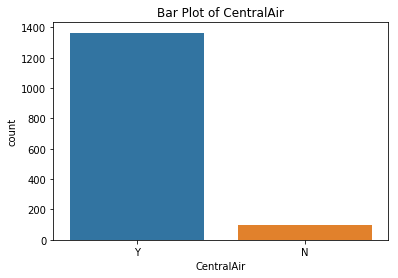

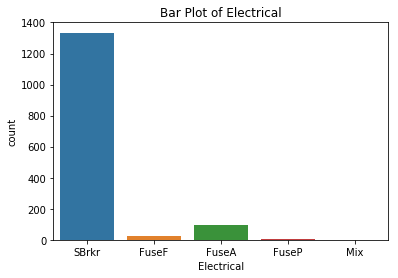

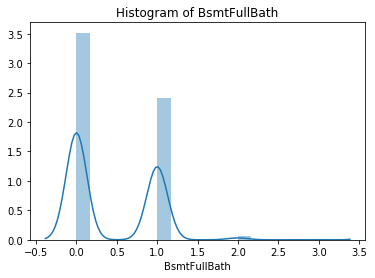

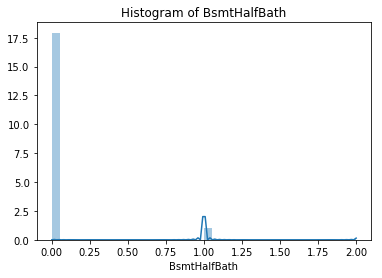

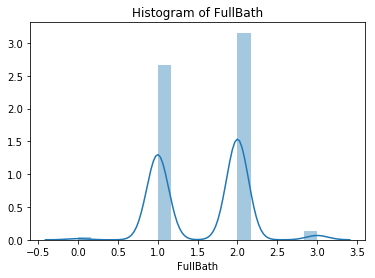

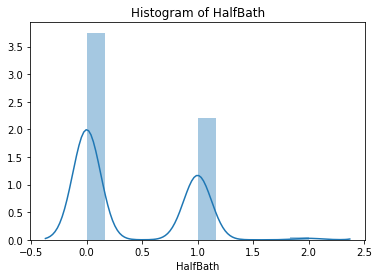

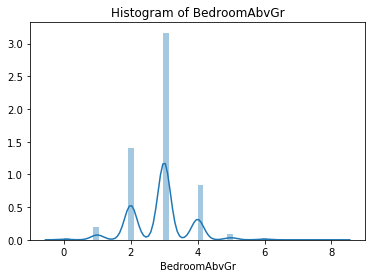

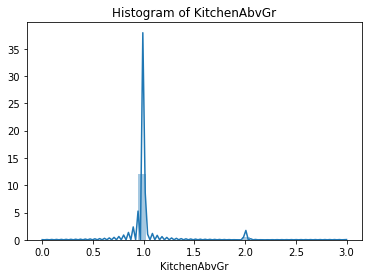

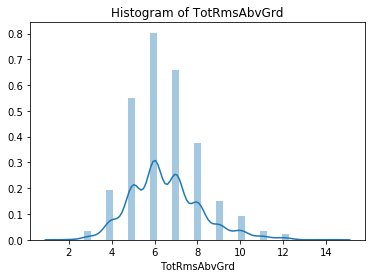

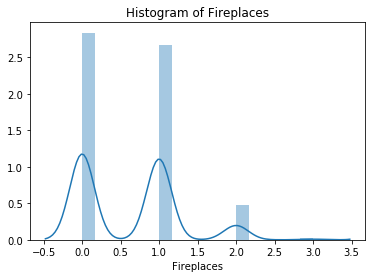

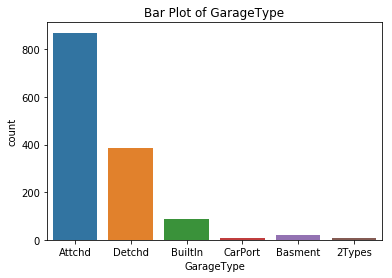

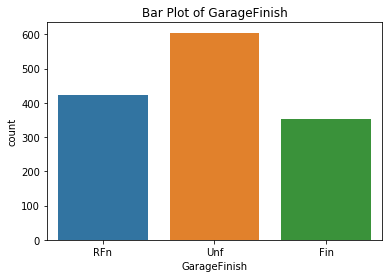

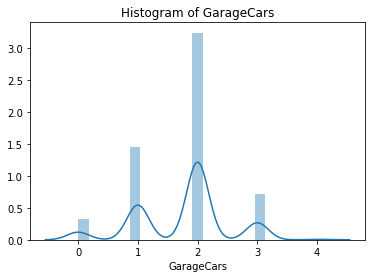

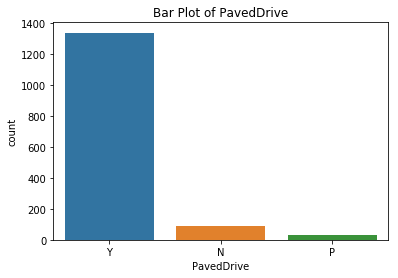

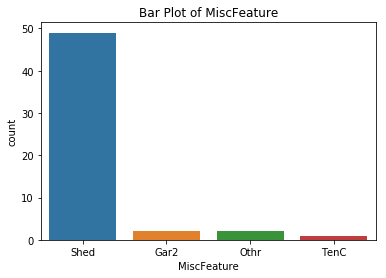

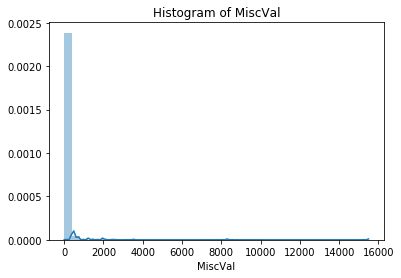

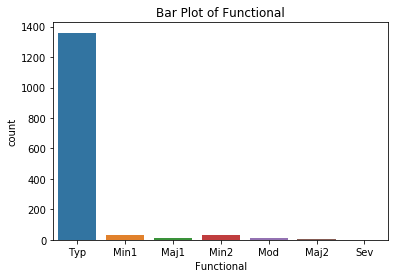

In [0]:
count_plot(building_features_detail)

Bedrooms and car garages tend to be normally distributed

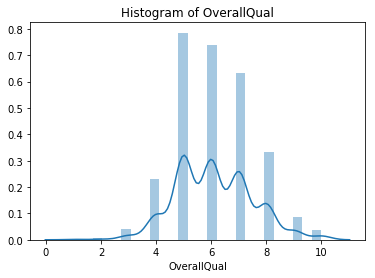

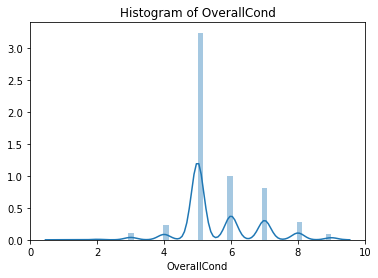

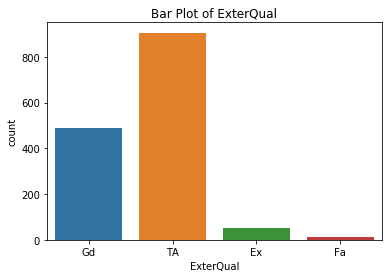

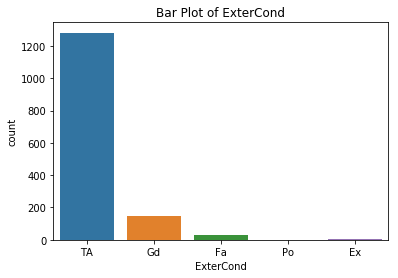

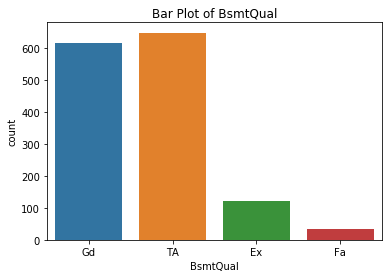

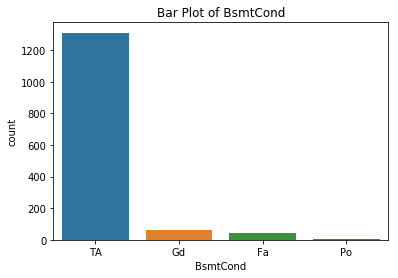

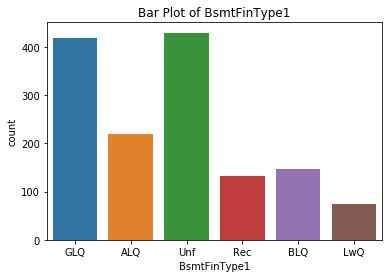

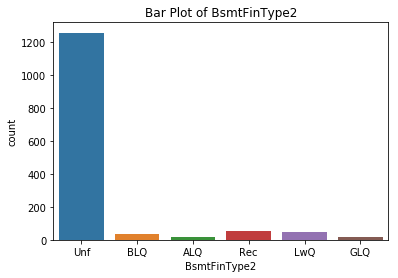

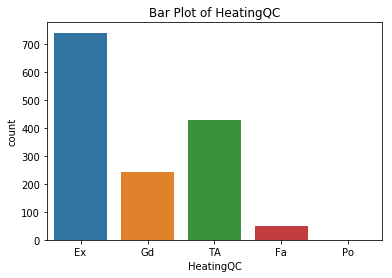

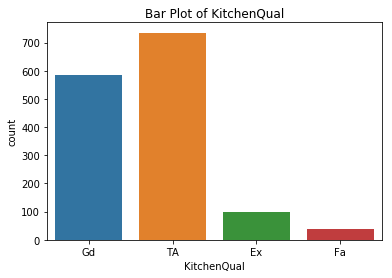

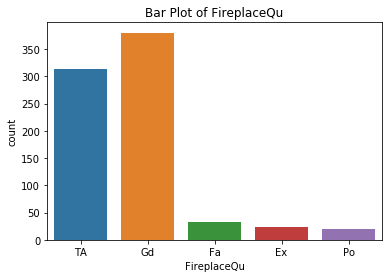

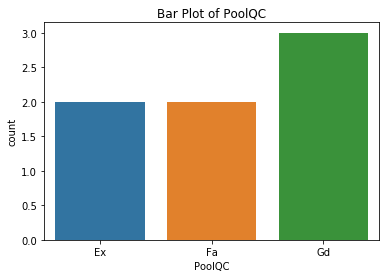

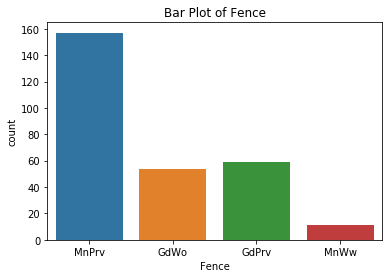

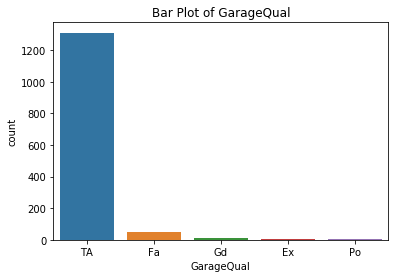

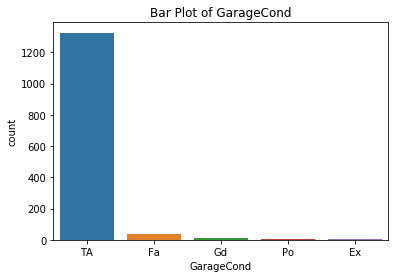

In [0]:
count_plot(building_features_qc)

The ordinality of quality and condition metrics is lost in these bar charts so we will likely want to transform them. Most of the qual/cond values seem to cluster around "typical." Overall quality and condition seem to be close to normally distributed.

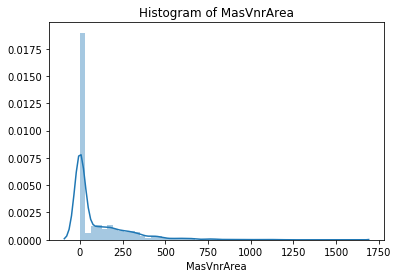

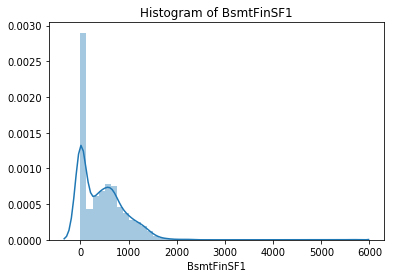

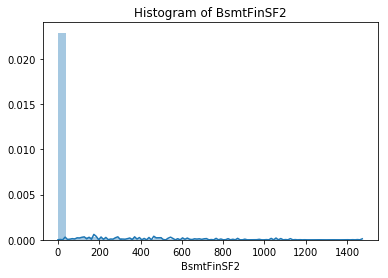

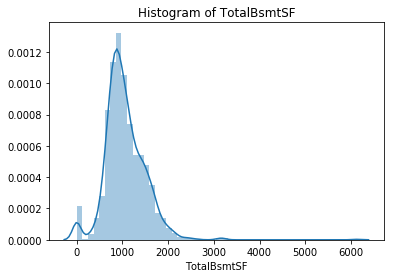

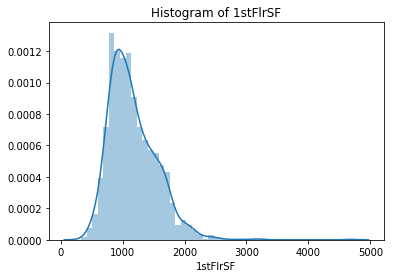

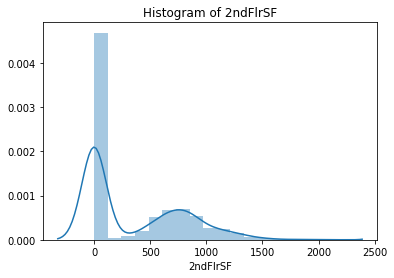

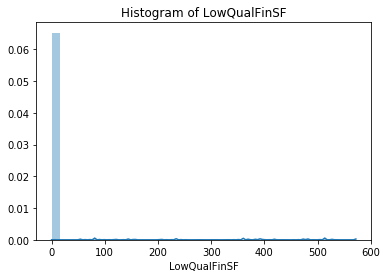

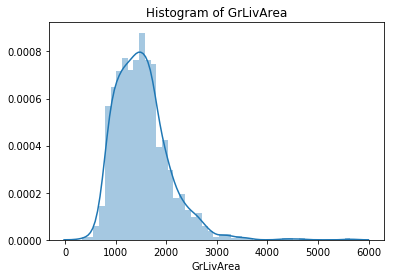

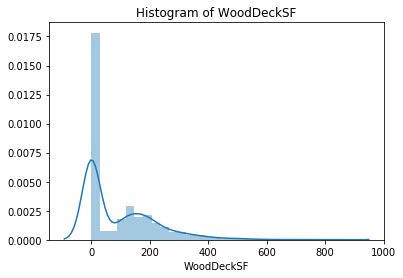

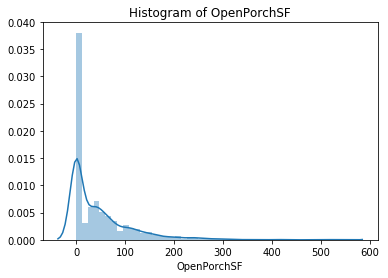

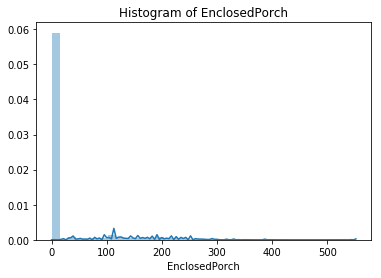

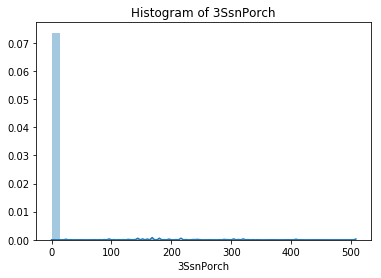

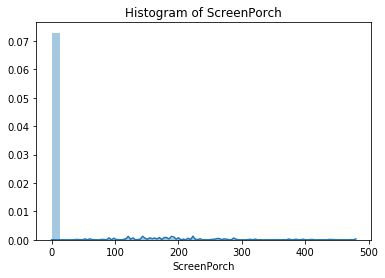

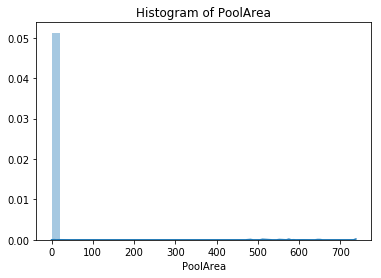

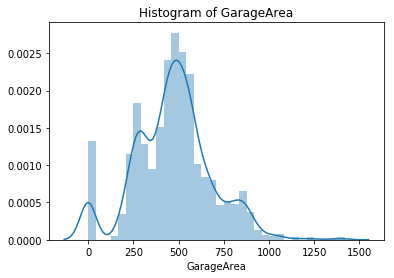

In [0]:
count_plot(building_features_sqft)

Many of the square footage measurements have a spike at 0 and a right tale which may count in favor of taking an adjusted logarithmic transformation of them. The spikes at 0 indicate that the house doesn't have a certain feature and as such we may consider imputing 0s or aggregating packages of houses based on the features they do and don't have.

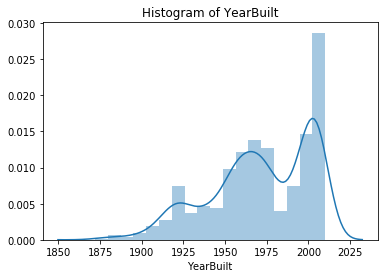

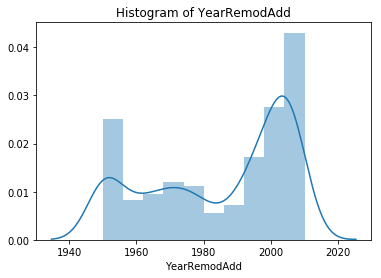

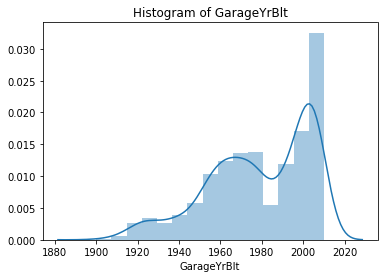

In [0]:
count_plot(building_age_features)

More houses have been built over time indicating that most houses are young. Newer houses likely had garages built whereas older houses didn't. There seems to be an intereting bi-modal distribution of remodels.

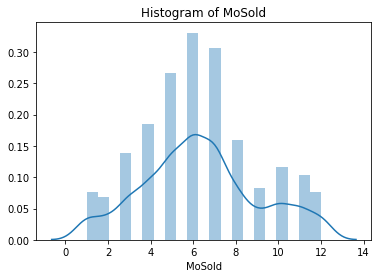

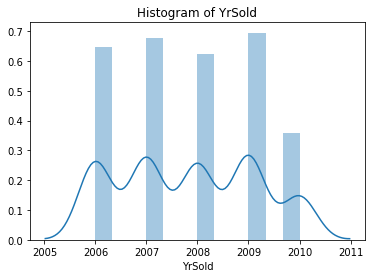

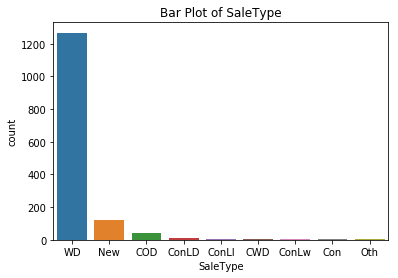

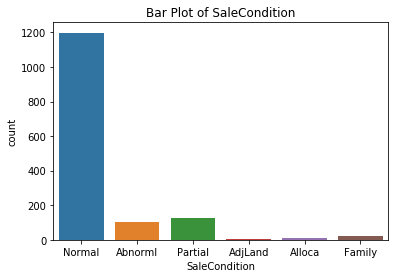

In [0]:
count_plot(building_sale_features)

Houses are most often sold in the summer. We likely don't have a full year's worth of data for 2010 because of the drop in sales.The sale condition of the house is most often normal.

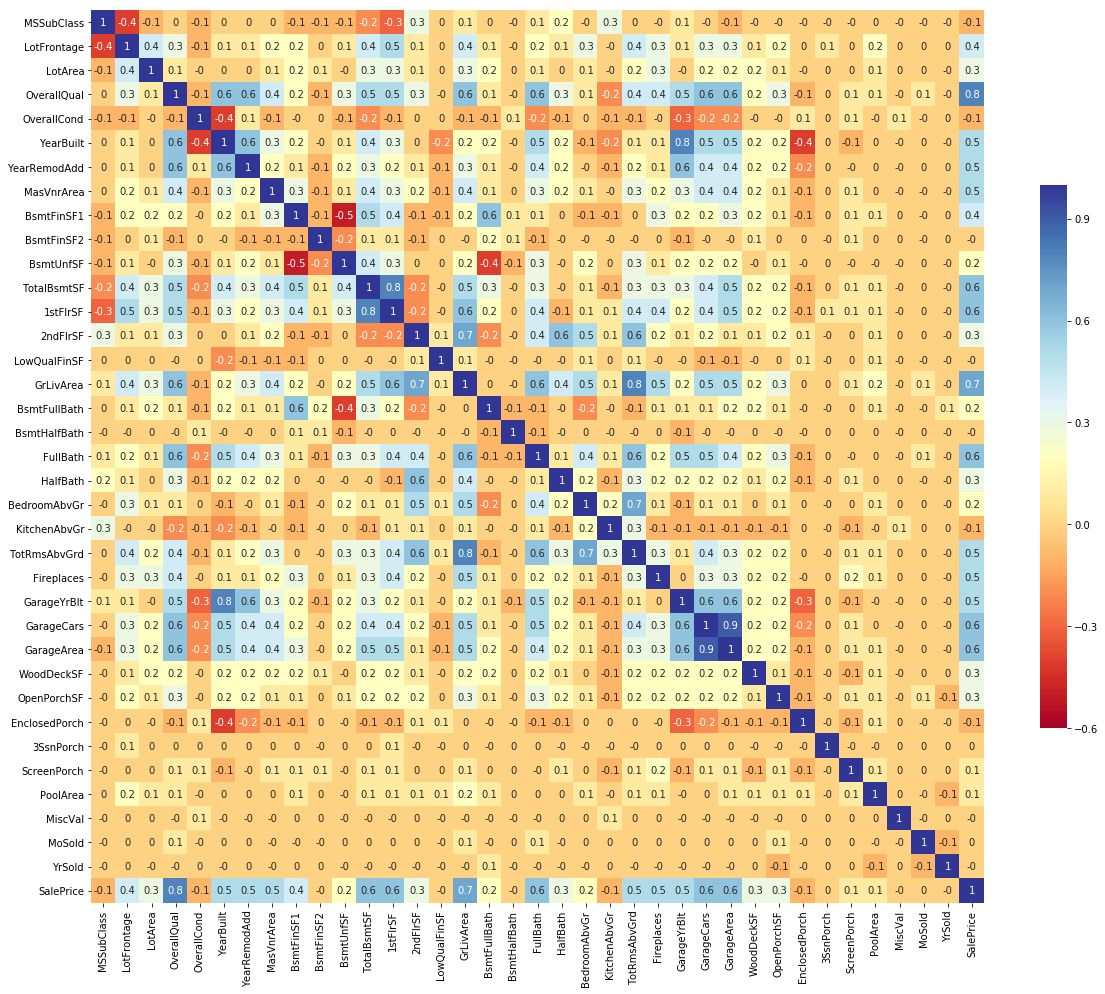

In [0]:
# Create correlation matrix to visualize correlations between variables
corr_round = train.drop('Id', axis=1).corr().round(1)
plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr_round, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, 
            square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

In [0]:
# correlations between SalePrice and other variables sorted by their absolute value
corr = train.corr()
corr['SalePrice'].abs().sort_values(axis=0, ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

We see the top 10 features most corrlated with SalePrice are: OverallQual, GrLivArea, GarageCars, GarageArea, etc.

# 4 Data Manipulation and Feature Engineering 

## 4.1 Cleaning data, managing missing data, and basic transformations

The following section provides the functions developed to ensure a traing data set has no missing data and categorical variables are recoded with dummies (one hot encoding). Included here as well is a function that returns the RMSE of a random forest regressor on a dataframe - this is useful for quickly testing the impact of feature engineering adjustments on the accuracy of the model without running the whole notebook each time.

In [0]:
#function to do initial cleaning and imputing missing values
def clean_and_missing(df):

    #remove ID since won't use as part of the models
    df.drop(['Id'], axis=1, inplace=True)

    # MSSubClass variable misclassified as numeric, adjust this
    df['MSSubClass'] = df['MSSubClass'].apply(str)

    # Separate out numeric and categorical variables
    categorical = []
    numeric = []
    for i in df.columns:
        if df[i].dtype == 'object':
            categorical.append(i)
        else:
            numeric.append(i)

    #Relabel all missing categorical data as 'NA'or 'None'
    for feature in categorical: 
        if df[feature].isnull().sum() != 0:
            if feature == 'MasVnrType':
                df.update(df[feature].fillna('None'))
            else:
                df.update(df[feature].fillna('NA')) 


    #Fill all missing numeric data with zero (on median for Garage year)
    for feature in numeric: 
        if df[feature].isnull().sum() != 0:
          if feature == 'GarageYrBlt':
            median = train_data[feature].median()
            train_data.update(train_data[feature].fillna(median, inplace=True)) 
          else:
            df.update(df[numeric].fillna(0))
            
    return df


In [0]:
#function to create dummies for all categorical variables
def one_hot_encoding(df):
  df=pd.get_dummies(df).reset_index(drop=True)
  return df

#function to create dummies for all categorical variables and remove those that
#are just dummies for 'missing'
def one_hot_encoding_removeNA(df):
  df=pd.get_dummies(df).reset_index(drop=True)
  for i in df.columns:
    if i[-3:] =='_NA' or i[-5:] == '_None':
        df.drop(i,axis=1,inplace=True)
  return df

In [0]:
#Quick TEMPORARY test function to try new dataframe on a randomforest regressor
def quick_rf_test(df):
  
  #transform SalesPrice with log(1+x) keep in new variables 'train_labels_log' 
  train_labels_log = np.log1p(train['SalePrice'])

  # Setup cross validation folds
  k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

  # Define cross-validation error metric
  def rmse_cv(model):
      rmse = np.sqrt(-cross_val_score(model, X=df, y=train_labels_log, scoring="neg_mean_squared_error", cv=k_fold))
      return (rmse)

  # Set up & Train XGB Regressor
  XGB = make_pipeline(StandardScaler(), XGBRegressor(objective = 'reg:squarederror'))
  score = rmse_cv(XGB)
  print(f"XGB with Cross Validation: mean({score.mean()}),sd ({score.std()})")

## 4.2 Feature Engineering

Various functions have been created in order to create new features based on various conditions. Putting these in functions will allow us to validate which of these (and in what order) provides the most improvement to model performance.

New Features developed:
 1.  *TotalLivableSF*: Total occupiable (living) square footage (sum of basement, 1st floor, 2nd floor, garage, wood deck, and open porch sqrft)
 2. *LivableSFPerLotArea*: Portion lot area that is livable (living total square footage divided by lot area)
 3. *TotalBaths*: Total number of baths
 4. *PercentBedrmtoRooms*: Portion of room that are bedrooms
 5. *YearsSinceRemodel*: Years since remodel if there was a remodel; years since build otherwise
 

In [0]:
def train_aug_features():
    """
    A function that augments our train dataframe with additional features
    These additional features are engineered to imporove the predictive power of our models
    """
    # Create a duplicate dataframe to feature engineer with
    train_aug = train.copy()

    # Total occupiable (living) square footage in the property
    train_aug['TotalLivableSF'] = train_aug['TotalBsmtSF'] + train_aug['1stFlrSF'] + train_aug['2ndFlrSF'] + train_aug['GarageArea'] + train_aug['WoodDeckSF'] + train_aug['OpenPorchSF']

    # Total Living Area divided by LotArea
    train_aug['LivableSFPerLotArea'] = train_aug['TotalLivableSF'] / train_aug['LotArea']

    # Total count of all bathrooms including full and half through the entire building
    train_aug['TotalBaths'] = train_aug['BsmtFullBath'] + train_aug['BsmtHalfBath'] + train_aug['HalfBath'] + train_aug['FullBath']

    # Percentage of total rooms are bedrooms
    train_aug['PercentBedroomtoRooms'] = train_aug['BedroomAbvGr'] / train_aug['TotRmsAbvGrd']

    # Number of years since last remodel, if there never was one it would be since it was built
    train_aug['YearSinceRemodel'] = 2016 - ((train_aug['YearRemodAdd'] - train_aug['YearBuilt']) + train_aug['YearBuilt'])
    
    return train_aug

train_aug = train_aug_features()

In [10]:
# correlation matrix with new features
# 4 of our 5 new features are strongly correlated indicating they may help improve our models
corr_aug = train_aug.corr()
corr_aug['SalePrice'].abs().sort_values(axis=0, ascending=False)

SalePrice                1.000000
TotalLivableSF           0.815688
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
TotalBaths               0.613005
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearSinceRemodel         0.507101
YearRemodAdd             0.507101
GarageYrBlt              0.486362
MasVnrArea               0.477493
Fireplaces               0.466929
BsmtFinSF1               0.386420
LotFrontage              0.351799
PercentBedroomtoRooms    0.336085
WoodDeckSF               0.324413
2ndFlrSF                 0.319334
OpenPorchSF              0.315856
HalfBath                 0.284108
LotArea                  0.263843
BsmtFullBath             0.227122
BsmtUnfSF                0.214479
BedroomAbvGr             0.168213
KitchenAbvGr             0.135907
EnclosedPorch 

In [0]:
# adjoin additional continuous features to train_data set
def aug_to_train_data(df):
    """
    Adds engineered features from train_aug_features to train_data
    """
    df['TotalLivableSF'] = train_aug['TotalLivableSF']
    df['LivableSFPerLotArea'] = train_aug['LivableSFPerLotArea']
    df['TotalBaths'] = train_aug['TotalBaths']
    df['PercentBedroomtoRooms'] = train_aug['PercentBedroomtoRooms']
    df['YearSinceRemodel'] = train_aug['YearSinceRemodel']
    
    return df

Some of our variables indicate quality or condition (ie. ExterQual, BsmtQual, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC) and their values are categorical. Given these possible values are ordinal -- in the sense that there order is meaningful -- we will write a function that transforms these featues within a dataframe to ordinal variables. 


In [0]:
# Converts the series in a dataframe from categorical features to ordinal numeric features
def cat_to_ord(df):
    """
    Takes a single parameter, a dataframe
    Converts a series in the df from categorical features to ordinal numeric features
    Ex. 'Po' (Poor) becomes 0 and 'Ex' (Excellent) becomes 4
    """
    cat_to_ord_features = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual',
                           'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    for series in cat_to_ord_features:
        df[series].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
    
    return df

To test the impact of taking the opposite approach of the function above, the following function converts variables that are ordinal (ie. OverallQual, OverallCond, FullBath, HalfBath, GarageCars, etc.) into categorical variables.

In [0]:
# Converts the series in a dataframe from numeric features to categorical features
def ord_to_cat(df):
    """
    Takes a single parameter, a dataframe
    Converts a series in the df from ordinal numeric features to categorical features
    Ex. 2 becomes '2'
    """
    # This set of features identified as set with small (<5) ordinal numeric values
    ord_to_cat_features = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
                           'BsmtHalfBath', 'FullBath', 'HalfBath', 
                           'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
                           'GarageCars', 'YrSold', 'MSSubClass']
    for series in ord_to_cat_features:
        df[series] = df[series].apply(str)
    return df    

In [0]:
#function that squares numeric data based on list of numeric features
def squares(df, list_):
    """
    Takes two parameters, a dataframe and a list of column names for numeric variables. 
    Returns a new dataframe which includes the original df and a new set of 
    features which is the square of the ones named in the list. 
    Ex. 'LotArea' in the list returns a dataframe with 'LotArea_sq' added 
    """
    m = df.shape[1] #original number of features
    for i in list_:
        df = df.assign(newcol=pd.Series(df[i]*df[i]).values)   
        df.columns.values[m] = i + '_sq'
        m += 1
    return df
  
#function that squares numeric data based on list of numeric features
def cubes(df, list_):
    """
    Takes two parameters, a dataframe and a list of column names for numeric variables. 
    Returns a new dataframe which includes the original df and a new set of 
    features which is the cubes of the ones named in the list. 
    Ex. 'LotArea' in the list returns a dataframe with 'LotArea_cube' added 
    """
    m = df.shape[1] #original number of features
    for i in list_:
        df = df.assign(newcol=pd.Series(df[i]*df[i]*df[i]).values)   
        df.columns.values[m] = i + '_cube'
        m += 1
    return df
  
#function that logs numeric data based on list of numeric features
def logs(df, list_):
    """
    Takes two parameters, a dataframe and a list of column names for numeric variables.
    Returns a new dataframe which includes the original df and a new set of 
    features which is the log of the ones named in the list. 
    Ex. 'LotArea' in the list returns a dataframe with 'LotArea_log' added 
    """
    m = df.shape[1] #original number of features
    for i in list_:
        df = df.assign(newcol=pd.Series(np.log(1.01+df[i])).values)   
        df.columns.values[m] = i + '_log'
        m += 1
    return df
 

In [0]:
# a function designed to display variables that are highly correlated with each other that we might want to remove
def highly_correlated_features(threshold):
    """
    Function prints a readable list of variables from the correlattion matrix of train data
    Prints each variable and its correlation with the other
    Developer can use this list to decide which variables make sense to include in a package
    that can be removed from the train data set because it contains set of variables
    highly correlated with others.
    Function takes one parameter, a threshold correlation value 
    below which it will not print variables
    """
    high_corr_fields = []
    for row in corr.index.values:
        for col in corr.columns.values:
            if col != row and col != 'SalePrice' and row != 'SalePrice' and corr[col][row] > threshold:
                high_corr_fields.append((row, col, corr[col][row]))

    std_lst = sorted(high_corr_fields, key=lambda tup: tup[2], reverse=True)
    for i in std_lst[1::2]:
        print('Variable 1: ', i[0], '\nVariable 2: ', i[1], '\nCorrelation: ', i[2], '\n')
       

In [0]:
# a function that gathers a set of variables that are barely correlated with SalePrice
def barely_correlated_features(threshold):
    """
    A function that creates a list of variables that have a low correlation with SalePrice
    Function takes one parameter, a threshold correlation value
    above which it will not add variables to the lowly correlated list
    """
    salesprice_corr = corr['SalePrice'].abs().drop('Id')
    saleprice_low_corr = salesprice_corr[salesprice_corr < threshold]
    barely_correlated_vars = []
    for i in saleprice_low_corr.index:
        barely_correlated_vars.append(i)
    return barely_correlated_vars

In [0]:
highly_correlated_features(0.6)

Variable 1:  GarageArea 
Variable 2:  GarageCars 
Correlation:  0.8824754142814603 

Variable 1:  GarageYrBlt 
Variable 2:  YearBuilt 
Correlation:  0.8256674841743434 

Variable 1:  TotRmsAbvGrd 
Variable 2:  GrLivArea 
Correlation:  0.8254893743088377 

Variable 1:  1stFlrSF 
Variable 2:  TotalBsmtSF 
Correlation:  0.8195299750050355 

Variable 1:  GrLivArea 
Variable 2:  2ndFlrSF 
Correlation:  0.6875010641666008 

Variable 1:  TotRmsAbvGrd 
Variable 2:  BedroomAbvGr 
Correlation:  0.6766199357426479 

Variable 1:  BsmtFullBath 
Variable 2:  BsmtFinSF1 
Correlation:  0.6492117535742737 

Variable 1:  GarageYrBlt 
Variable 2:  YearRemodAdd 
Correlation:  0.6422767797035414 

Variable 1:  FullBath 
Variable 2:  GrLivArea 
Correlation:  0.6300116462511144 

Variable 1:  TotRmsAbvGrd 
Variable 2:  2ndFlrSF 
Correlation:  0.6164226354915353 

Variable 1:  HalfBath 
Variable 2:  2ndFlrSF 
Correlation:  0.6097073002717444 

Variable 1:  GarageCars 
Variable 2:  OverallQual 
Correlation:  0

In [17]:
high_corr = ['GarageCars', 'GarageYrBlt']
low_corr = barely_correlated_features(0.3)

NameError: ignored

In [18]:
def find_low_meaning_features(fields, threshold_1, threshold_2):
    low_meaning_fields = []
    for f in fields:
        if train[f].dtype == 'object':
            field_agg = train[['Id', f]].groupby(f).agg('count')
            field_agg_portion = (field_agg / field_agg.sum()).sort_values('Id', ascending=False)
            if field_agg_portion.Id[0] > threshold_1:
                low_meaning_fields.append(f)
        else:
            zero_field = train[f].where(lambda x : x == 0).count()
            zero_field_portion = zero_field / train[f].count()
            if zero_field_portion > threshold_2:
                low_meaning_fields.append(f)
    return low_meaning_fields

lmf = find_low_meaning_features(all_features, 0.8, 0.3)

NameError: ignored

In [0]:
# for i in range(2):
# #     print(i)
#     train_aug[str('test_{0}'.format(i))] = train['MasVnrArea']
    
# train_aug[['test_0', 'test_1']]
    
# train_aug.drop(['test_0', 'test_1'], axis=1)

In [0]:
# train_aug.head()
# f_mean = train['MasVnrArea'][train['MasVnrArea'] != 0].mean()
# train['MasVnrArea'][train['MasVnrArea'] != 0].std()
# train['MasVnrArea'][train['MasVnrArea'] != 0].mean()
for f in low_meaning_fields:
    # Calculate the mean of the field without a 0
    f_mean = train[f][train[f] != 0].mean()
    # Calculate the standard deviation of the field wihtout a 0
    f_sd = train[f][train[f] != 0].std()
    # create a new field in train_aug df that is initiated as low_meaning field
    train_aug[str('{0}_binned'.format(f))] = train[f]
    for i in train_aug[str('{0}_binned'.format(f))]:
        if i == 0:
            continue
        else:
            
            
    # transform non-zero values in field by subtracting by mean and dividing by sd
    
    # 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivableSF,LivableSFPerLotArea,TotalBaths,PercentBedroomtoRooms,YearSinceRemodel
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3175,0.375740,4,0.375000,13
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3282,0.341875,3,0.500000,40
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3356,0.298311,4,0.500000,14
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3150,0.329843,2,0.428571,46
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4455,0.312412,4,0.444444,16


#### 4.2.1 Feature Engineering Testing

In [0]:
# initiate train_data dataframe: train data cleaned, missing data imputed 

# set random seed
np.random.seed(0)

# initiate train_data dataframe: train data cleaned, missing data imputed 
train_data = train.drop('SalePrice',axis=1)
train_data = clean_and_missing(train_data)

In [66]:
##############################
########## TESTING ###########
##############################

# transform train_data here
# train_data.drop(high_corr, axis=1)

# A TRAIN_DATA AUGMENTATION
# aug_to_train_data(train_data) #1

# B TRAIN_DATA TRANFORMATION
# cat_to_ord(train_data) #2
# ord_to_cat(train_data) #3
# train_data = squares(train_data, continuous_numeric_features) #4 NOT WORKING
# cubes(train_data, continuous_numeric_features) #5 NOT WORKING
# logs(train_data, continuous_numeric_features) #6 NOT WORKING

# C TRAIN_DATA SUBTRACTION
# train_data = train_data.drop(high_corr, axis=1) #8
# train_data = train_data.drop(low_corr, axis=1) #9
# train_data = train_data.drop(lmf, axis=1) #10
# train_data = train_data[categorical_features] #11
# train_data = train_data[continuous_numeric_features] #12
# train_data = train_data[discrete_numeric_features] #13
# train_data = train_data[numeric_features] #14
# train_data = train_data[building_features] #15
# train_data = train_data[building_features_detail_all] #16
# train_data = train_data[building_sale_features] #17
# train_data = train_data[building_features_interior] #18
# train_data = train_data[building_features_exterior] #19

#D CHAIN POSITIVE TRANSFORMATIONS TOGETHER
# Transformation #20

#train_data = train_data[building_features] #15
#aug_to_train_data(train_data) #1

#LEE AND PAUL LIVE SESSION
#train_data = squares(train_data, continuous_numeric_features) #4 NOT WORKING
# cubes(train_data, continuous_numeric_features) #5 NOT WORKING
train_data = logs(train_data, continuous_numeric_features) #6 NOT WORKING


# Transformation #21
#train_data = train_data[building_features] #15
#train_data = train_data.drop(high_corr, axis=1) #8
#aug_to_train_data(train_data) #1
#cat_to_ord(train_data) #2


##############################

# see what train_data looks like before one hot encoding
train_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,4.189806,9.042041,5.283254,6.561045,0.00995,5.017346,6.753450,6.753450,6.751113,0.00995,7.444839,6.308117,0.009950,4.127296,0.00995,0.00995,0.00995,0.00995,0.00995
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,4.394573,9.169624,0.009950,6.886542,0.00995,5.652524,7.141253,7.141253,0.009950,0.00995,7.141253,6.133420,5.700477,0.009950,0.00995,0.00995,0.00995,0.00995,0.00995


In [67]:
#D CHAIN POSITIVE TRANSFORMATIONS TOGETHER
# Transformation #20

train_data = train_data[building_features] #15
aug_to_train_data(train_data) #1


# One hot encode performed with removing the _NA dummies
train_data = one_hot_encoding_removeNA(train_data)


# use quick_rf_test to test impact of feature engineering
quick_rf_test(train_data)

XGB with Cross Validation: mean(0.12752392306222574),sd (0.01987761784998072)


No transformations: XGB with Cross Validation: mean(0.13013821445152982),sd (0.019594055844270444)<br><br>


TESTING IMPACT OF AUGMENTING WITH NEW VARIABLES 

**Adding variables from train_aug**

**Tranformation #1: XGB with Cross Validation: mean(0.12805816194645542),sd (0.021138275209648814)**<br><br>


TESTING IMPACT OF TRANFORMING SETS OF VARIABLES

_Categorical variables transformed to ordinal variables_

_Transformation #2: XGB with Cross Validation: mean(0.13010360460781287),sd (0.02021131679473728)_

Ordinal variables tranformed to categorical variables

Tranformation #3: XGB with Cross Validation: mean(0.133385689388281),sd (0.019312020885931872)

Set of features squared

Transformation #4: XGB with Cross Validation: mean(0.13013821445152982),sd (0.019594055844270444)<br><br>


TESTING IMPACT OF DROPPING CERTAIN FEATURE PACKAGES

_Drop features highly correlated with each other_

_Transformation #8: XGB with Cross Validation: mean(0.13171987090765355),sd (0.018820281308964924)_

Drop features that have low correlation with SalePrice

Transformation #9: XGB with Cross Validation: mean(0.13529682048208386),sd (0.019861378730859212)

Drop features that have low meaning (categorical mostly one value or numerical largely 0s)

Transformation #10: XGB with Cross Validation: mean(0.13298939460385015),sd (0.02124638821513351)<br><br>


TESTING IMPACT OF ITERATIVELY ADDING FEATURE PACKAGES

Only categorical variables

Transformation #11: XGB with Cross Validation: mean(0.1896123022167703),sd (0.019765963378526315)

Only continuous numerical variables

Transformation #12: XGB with Cross Validation: mean(0.18565718556463193),sd (0.02121504675259673)

Only discrete numerical features

Transformation #13: XGB with Cross Validation: mean(0.16169794562484496),sd (0.012852860492536634)

Numeric features (exclusing categorical features)

Transformation #14: XGB with Cross Validation: mean(0.13487934985965683),sd (0.019610795367310887)

**All building features (exclude building sale features)**

**Transformation #15: XGB with Cross Validation: mean(0.12964709096747032),sd (0.018760325883393998)**

Building detail features

Transformation #16: XGB with Cross Validation: mean(0.14051481906138202),sd (0.02128101699922473)

Just building sale features

Transformation #17: XGB with Cross Validation: mean(0.38069820116172515),sd (0.019703149634461906)

Interior building features

Transformation #18: XGB with Cross Validation: mean(0.15256645290444132),sd (0.021539152090773773)

Exterior building features

Transformation #19: XGB with Cross Validation: mean(0.2651158806282909),sd (0.021057732002075405)<br><br>

TESTING IMPACT OF CHAINING POSITIVE TRANSFORMATIONS TOGETHER

Limiting features to all building features and adding augment features

**Transformation #20: XGB with Cross Validation: mean(0.12752392306222574),sd (0.01987761784998072)**

Adding the two borderline transformations (cat_to_ord and high_corr drop) to #20 for posterity

Transformation #21: XGB with Cross Validation: mean(0.12879826590030297),sd (0.02037928271072925)

In [0]:
#create lists of categorical and numeric feature names
categorical = []
numeric = []
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        categorical.append(i)
    else:
        numeric.append(i)
        

NameError: ignored

## 4.3 PCA For Dimensionality Reduction

As an alternative approach, given our large (300+) number of features, we have also applied principle component analysis to support our model fitting/predicting process below.

Currently it looks like we can explain over 99% of the variance with 3 principle components, but we lose a lot of accuracy in our model fit when we limit it this way. Using 30 principle components, we lose approximately .01 on our RMSE score, however we can considerable modelling speed. Might use these version below hypertune our models and then use those parameters on the original dataset.


Cumulative explained variance: 
 [0.98281995 0.98790462 0.99128929 0.99406544 0.99647559 0.99844115
 0.99894053 0.99924728 0.99950449 0.9996875  0.99982589 0.99986686
 0.9999001  0.99993031 0.99995784 0.99997298 0.99998336 0.99999173
 0.99999775 0.99999976 0.99999984 0.99999985 0.99999986 0.99999987
 0.99999988 0.99999989 0.99999989 0.9999999  0.9999999  0.9999999
 0.99999991 0.99999991 0.99999991 0.99999992 0.99999992 0.99999992
 0.99999992 0.99999993 0.99999993 0.99999993 0.99999993 0.99999993
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999995 0.99999995]


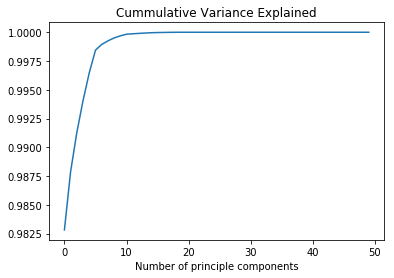

In [0]:
pca_mod = PCA(n_components = 50)
pca_mod.fit_transform(train_data)

k=range(50)
plt.plot(k, np.cumsum(pca_mod.explained_variance_ratio_))
plt.title("Cummulative Variance Explained")
plt.xlabel('Number of principle components')

print('\nCumulative explained variance: \n', np.cumsum(pca_mod.explained_variance_ratio_))

In [0]:
#create PCA instance with 30 components
pca_mod30 = PCA(n_components = 30)

#fit to train data
pca30_data = pca_mod30.fit_transform(train_data)


# 5 Examine and Prepare labels for modelling

Our outcome variable, SalesPrice, is right skewed which is typical for monetary outcomes. We will log transform this outcome to achieve a normal distribution before fitting the models and performing predictions. These are transformed back in Section 9 for the pupose of Kaggle submissions. 



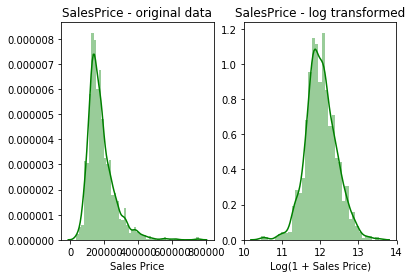

In [25]:
#transform SalesPrice with log(1+x) keep in new variables 'train_labels_log' 
train_labels = train['SalePrice']
train_labels_log = np.log1p(train['SalePrice'])

#histogram of label (SalesPrice)
plt.subplot(1, 2, 1)
sns.distplot(train_labels, color="g");
plt.title('SalesPrice - original data')
plt.xlabel('Sales Price')

plt.subplot(1, 2, 2)
sns.distplot(train_labels_log, color="g");
plt.title('SalesPrice - log transformed')
plt.xlabel('Log(1 + Sales Price)')

plt.show()

# 6 Set up performance metric, k-fold validation and baseline model

Error metric is root mean squared error (RMSE) <br>

K-Fold Cross-Validation selected due to small size of training set (1460 examples) and no test data with labels available for evaluation <br>

Baseline comparison is median home value predictor, goal is to show improvement over baseline with our subsequent models. Note that this is based on log of Sales Price, so the rmse is much smaller than it would be if it were based on actual Sales Price. The Baseline of median prediction results in a rmse of 0.40 so this is the reference point.

In [81]:
#basic rmse function created 
def rmse(labels, pred):
    return np.sqrt(mean_squared_error(labels, pred))

# Setup cross validation folds
k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

# Define cross-validation error metric
def rmse_cv(model, X_name=train_data):
    rmse = np.sqrt(-cross_val_score(model, X=X_name, y=train_labels_log, 
                                    scoring="neg_mean_squared_error", cv=k_fold))
    return (rmse)

#create baseline model on median home price
dummy_median = DummyRegressor(strategy='median')
dummy_regressor = dummy_median.fit(train_data, train_labels_log)

#just look at first five examples
some_data = train_data.iloc[:5]
some_labels = train_labels_log.iloc[:5]
print("Labels:", list(some_labels))
print("Baseline Predictions:", dummy_regressor.predict(some_data))

#baseline rmse score
baseline_score = rmse_cv(dummy_regressor)
print(f"Median Baseline with Cross Validation mean(sd): \
{round(baseline_score.mean(),4)} ({round(baseline_score.std(),4)})")


Labels: [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Baseline Predictions: [12.00151161 12.00151161 12.00151161 12.00151161 12.00151161]
Median Baseline with Cross Validation mean(sd): 0.4001 (0.0253)


# 7 Fit Models and report accuracy

For each model, first we selected the most appropriate scaler type (MinMaxScaler, StandardScaler, or RobustScaler) based on background reading and testing. GridsearchCV was applied to a range of appropriate parameters. In some instances the run time was too long and we used the dimensionality reduced (pca30_data) train data to define our optimal hyperparameters.

## 7.1 KNN

Final KNN regressor already fitted with best scaler (MinMax) and gridsearchcv to identify best K. This already provides a 50% reduction in the RMSE over baseline.

In [33]:
#KNN optimised with best scaler and n-value
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=7))
knn_score = rmse_cv(knn)
print(f"KNN with Cross Validation mean(sd): {round(knn_score.mean(),4)} ({round(knn_score.std(),4)})")

KNN with Cross Validation mean(sd): 0.2033 (0.0197)


A few simple exercises performed below. 
1. Demonstrating how to look at results in real Sales Prices (rather than log Sales Prices) when this is useful/relevant
2. Looking at RMSE results when applying PCA with 30 components - this highlights that performance suffers though speed is much better
3. GridsearchCV applied to relevant parameters - this highlights that optimal parameters are not the same for pca data and the normal training data

In [0]:
#Demonstrate how to shift back to 'real prices' - this has bee implemented in...
#...Kaggle section below
print("KNN Predictions in real price terms:",np.floor(np.expm1(knn.predict(some_data))))
print("Labels:", list(np.floor(np.expm1(some_labels))))
print("KNN RMSE on 5 instances in real price terms:", 
      rmse(np.floor(np.expm1(some_labels)),np.floor(np.expm1(knn.predict(some_data)))))

KNN Predictions in real price terms: [215543. 150783. 234241. 174552. 260744.]
Labels: [208499.0, 181500.0, 223500.0, 139999.0, 249999.0]
KNN RMSE on 5 instances: 21990.388536813076


In [0]:
#KNN optimised with best scaler and n-value using PCA30 reduced data
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=5))
knn_pca_score = rmse_cv(knn,pca30_data)
print(f"KNN with PCA & CV mean(sd): {round(knn_pca_score.mean(),4)} ({round(knn_pca_score.std(),4)})")

KNN with PCA & CV mean(sd): 0.2351 (0.0187)


In [0]:
#use gridsearch to test values for n_neighbors (comment out once finalised)

param_grid =  {'kneighborsregressor__n_neighbors': [1,3,5,7,9,11,13,15,17]}
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor())
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels_log)
print(f"Best K is {grid_search.best_params_}")


Best K is {'kneighborsregressor__n_neighbors': 7}


In [0]:
#use gridsearch to test values for n_neighbors WITH PCA data (comment out once finalised)

param_grid =  {'kneighborsregressor__n_neighbors': [1,3,5,7,9,11,13,15,17]}
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor())
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(pca30_data, train_labels_log)
print(f"Best K is {grid_search.best_params_}")

#knn.get_params().keys()

Best K is {'kneighborsregressor__n_neighbors': 5}


## 7.2 Linear Regression

Final Linear Regression uses L2 Regularization (aka Ridge Regression) with an alpha=10. 

In [34]:
#Final ridge regression (linear regression with L2 Regularization)
ridge_reg = Ridge(alpha=10, solver="cholesky")
rr_score = rmse_cv(ridge_reg)
print(f"Ridge Regression with Cross Validation mean(sd): {round(rr_score.mean(),4)} ({round(rr_score.std(),4)})")

Ridge Regression with Cross Validation mean(sd): 0.1454 (0.0335)


The below shows other considerations:
1. Standard Linear Regression model
2. Ridge regression optimised (alpha=1) with the pca30_data. This exercise shows once again that pca results are inferior, but this demonstrated that we can't expect the same hyperparameters for both types of training data (in fact, pca data was not able to detect differences in alpha)
3. GridSearchCV parameters/outputs

In [35]:
#Final linear regression mode - no scaler needed (seems to make results worse!)
lin_reg = LinearRegression()
lr_score = rmse_cv(lin_reg)
print(f"Linear Regression with Cross Validation mean(sd): \
{round(lr_score.mean(),4)} ({round(lr_score.std(),4)})")


Linear Regression with Cross Validation mean(sd): 0.1673 (0.0513)


In [36]:
#ridge regression using PCA (linear regression with L2 Regularization)
ridge_reg = Ridge(alpha=1, solver="cholesky")
rr_pca_score = rmse_cv(ridge_reg,pca30_data)
print(f"Ridge Regression with PCA & CV mean(sd): {round(rr_pca_score.mean(),4)}\
({round(rr_pca_score.std(),4)})")

Ridge Regression with PCA & CV mean(sd): 0.1574(0.0357)


In [0]:
#use gridsearch to test values for LR (comment out once finalised)

param_grid =  {'alpha':[.01,.1,.5,1,5,10,25,50, 100]}
ridge_reg = Ridge(solver="cholesky")
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels_log)
print(f"Best Parameter is is {grid_search.best_params_}")


Best Parameter is is {'alpha': 10}


##7.3 Decision Trees (basic)

Basic Decision Tree and Random Forest Models. RandomForest obviously superior so focused here on hypertuning with gridsearchCV. Tested PCA data as well

In [27]:
# Basic Decision Tree Regressor
dectree_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor())
dt_score = rmse_cv(dectree_reg)
print(f"Decision Tree Regression with Cross Validation mean(sd): {round(dt_score.mean(),4)} ({round(dt_score.std(),4)})")

Decision Tree Regression with Cross Validation mean(sd): 0.1994 (0.0182)


In [28]:
# Decision Tree Regressor with PCA
dectree_reg = make_pipeline(StandardScaler(), DecisionTreeRegressor())
dt_score = rmse_cv(dectree_reg,pca30_data)
print(f"Decision Tree Regression with Cross Validation mean(sd): {round(dt_score.mean(),4)} ({round(dt_score.std(),4)})")

Decision Tree Regression with Cross Validation mean(sd): 0.2312 (0.011)


In [32]:
# Hypertuned Random Forest Regressor with train_data (with PCA optimal parameters..)

ranfor_reg = make_pipeline(StandardScaler(), 
                           RandomForestRegressor(random_state=0,
                                                 max_depth=14, 
                                                 min_samples_split=2,
                                                 n_estimators=100))

rf_score = rmse_cv(ranfor_reg)
print(f"Random Forest Regression with Cross Validation mean(sd): {round(rf_score.mean(),4)} ({round(rf_score.std(),4)})")

Random Forest Regression with Cross Validation mean(sd): 0.1379 (0.0232)


In [31]:
# Hypertuned Random Forest Regressor with pca30_data

ranfor_reg = make_pipeline(StandardScaler(), 
                           RandomForestRegressor(random_state=0,
                                                 max_depth=14, 
                                                 min_samples_split=2,
                                                 n_estimators=100))

rf_pca_score = rmse_cv(ranfor_reg,pca30_data)
print(f"Random Forest Regression with Cross Validation mean(sd): {round(rf_pca_score.mean(),4)} ({round(rf_pca_score.std(),4)})")

Random Forest Regression with Cross Validation mean(sd): 0.1575 (0.017)


In [0]:
#use gridsearch to hypertune Random Forest with PCA30 (comment out once finalised)

param_grid = [{'randomforestregressor__n_estimators':[25,50,100],
               'randomforestregressor__criterion': ['mae', 'mse'],
               'randomforestregressor__min_samples_split':[2,10,20],
               'randomforestregressor__max_depth':[None, 7, 14]}]
ranfor_reg = make_pipeline(StandardScaler(), 
                           RandomForestRegressor(random_state=0))
grid_search = GridSearchCV(ranfor_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(pca30_data, train_labels_log)
print(f"Best Parameter is is {grid_search.best_params_}")

#result: Best Parameter is is {'randomforestregressor__criterion': 'mse', 
#'randomforestregressor__max_depth': 14, 'randomforestregressor__min_samples_split': 2, 
#'randomforestregressor__n_estimators': 100}

Best Parameter is is {'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': 14, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}


In [0]:
#use gridsearch to hypertune Random Forest - TRAIN_DATA (haven't used, too long to run)

param_grid = [{'randomforestregressor__n_estimators':[25,50,100],
               'randomforestregressor__criterion': ['mae', 'mse'],
               'randomforestregressor__min_samples_split':[2,10,20],
               'randomforestregressor__max_depth':[None, 7, 14]}]
ranfor_reg = make_pipeline(StandardScaler(), 
                           RandomForestRegressor(random_state=0))
grid_search = GridSearchCV(ranfor_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels_log)
print(f"Best Parameter is is {grid_search.best_params_}")

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

##7.4 Decision Trees (advanced)

A  popular boosting technique is XGBRegressor, which is an implementation of gradient boosted decision trees designed for speed and performance. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

Despite its speed, we still struggled to hypertune a model based on the full train_data set, so we instead used the PCA30_data for hyperparameter tuning and applied this to the main data_set. This provided our strongest results, even if they may not have been fully optimized to the train_data.

In [77]:
# Final XGB Regressor based on optimal parameters from PCA30 (but using train_data)
XGBModel = make_pipeline(StandardScaler(), 
                         XGBRegressor(objective = 'reg:squarederror',
                                     colsample_bytree=0.7,
                                     learning_rate=0.03,
                                     max_depth=5,
                                     min_child_weight=4,
                                     n_estimators=500,
                                     nthread=4,
                                     silent=1,
                                     subsample=0.7))

xgb_score = rmse_cv(XGBModel)
print(f"XGB Regression with Cross Validation mean(sd): {round(xgb_score.mean(),4)} ({round(xgb_score.std(),4)})")



XGB Regression with Cross Validation mean(sd): 0.1202 (0.0195)


In [76]:
# Set up XGB Regressor using PCA30 reduced data
# even optimized, its better with the train_data
XGBModel = make_pipeline(StandardScaler(), 
                         XGBRegressor(objective = 'reg:squarederror',
                                     colsample_bytree=0.7,
                                     learning_rate=0.03,
                                     max_depth=5,
                                     min_child_weight=4,
                                     n_estimators=500,
                                     nthread=4,
                                     silent=1,
                                     subsample=0.7))

xgb_pca_score = rmse_cv(XGBModel,pca30_data)
print(f"XGB Regression with PCA & CV mean(sd): {round(xgb_pca_score.mean(),4)} \
({round(xgb_pca_score.std(),4)})")


XGB Regression with PCA & CV mean(sd): 0.1361 (0.0186)


In [74]:
#Gridsearch over PCA data version of XGB regression

param_grid = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
              'xgbregressor__learning_rate': [.03, 0.05, .07, .3], #so called `eta` value
              'xgbregressor__max_depth': [5, 6, 7],
              'xgbregressor__min_child_weight': [1,4],
              'xgbregressor__silent': [1],
              'xgbregressor__subsample': [0.7,1],
              'xgbregressor__colsample_bytree': [0.7,1],
              'xgbregressor__n_estimators': [500]}

xgb_reg = make_pipeline(StandardScaler(), 
                           XGBRegressor(random_state=0,objective = 'reg:squarederror'))

grid_search = GridSearchCV(xgb_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(pca30_data, train_labels_log)
print(f"Best Parameter is is {grid_search.best_params_}")

#result: Best Parameter is is {'xgbregressor__colsample_bytree': 0.7, 
#'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 5, 
#'xgbregressor__min_child_weight': 4, 'xgbregressor__n_estimators': 500, 
#'xgbregressor__nthread': 4, 'xgbregressor__silent': 1, 'xgbregressor__subsample': 0.7}

Best Parameter is is {'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 4, 'xgbregressor__n_estimators': 500, 'xgbregressor__nthread': 4, 'xgbregressor__silent': 1, 'xgbregressor__subsample': 0.7}


##7.5 Suppor Vector Machine Regression

Early iterations Support Vector Regression demonstrated that the optimal kernal was 'linear', consequently we have moved to LinearSVR() which is similar to SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better (at least to large numbers of samples). For this model, PCA really helps to improve accuracy as well as performance which allowed for better hyperparameter tuning (it was challenging to run GridSearch)

In [79]:
# Final SVM (Support Vector Machine) Regressor using PCA data (with tuning)
svm_reg = make_pipeline(StandardScaler(), 
                        LinearSVR(max_iter=5000,C=.1,random_state=0))
svm_pca_score = rmse_cv(svm_reg,pca30_data)
print(f"SVM Regression with Cross Validation mean(sd):\
      {round(svm_pca_score.mean(),4)} ({round(svm_pca_score.std(),4)})")

SVM Regression with Cross Validation mean(sd):      0.1533 (0.0455)


The below code provides:
1. SVM results on the train_data (inferior to PCA30_data)
2. Gridsearch on both datasets as well as a prior gridsearchcv on the SVR model which resulted in our choice of using LinearSVR instead

In [80]:
# Set up SVM (Support Vector Machine) Regressor on train_data (with tuning)
svm_reg = make_pipeline(StandardScaler(), 
                        LinearSVR(max_iter=5000,C=.1,epsilon=.01,random_state=0))
score = rmse_cv(svm_reg)
print(f"SVM Regression with Cross Validation mean(sd):\
      {round(score.mean(),4)} ({round(score.std(),4)})")

SVM Regression with Cross Validation mean(sd):      0.1608 (0.0469)


In [0]:

#use gridsearch on svm on train_data (VERY SLOW TO RUN!)
'''
param_grid = [{'linearsvr__epsilon':[0, 0.01, 0.1, 1],
               'linearsvr__C': [.1, 1, 5, 10]}]
svm_reg = make_pipeline(StandardScaler(), 
                        LinearSVR(max_iter=5000,random_state=0))
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(train_data, train_labels_log)
print(f"Best paramater is {grid_search.best_params_}")
'''
#svm_reg.get_params().keys()  #name of available parameters for grid search cv
#result: Best paramater is {'linearsvr__C': 0.1, 'linearsvr__epsilon': 0.01}

'\nparam_grid = [{\'linearsvr__epsilon\':[0, 0.01, 0.1, 1],\n               \'linearsvr__C\': [.1, 1, 5, 10]}]\nsvm_reg = make_pipeline(StandardScaler(), \n                        LinearSVR(max_iter=5000,random_state=0))\ngrid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring=\'neg_mean_squared_error\')\ngrid_search.fit(train_data, train_labels_log)\nprint(f"Best paramater is {grid_search.best_params_}")\n'

In [0]:
#use gridsearch on svm on PCA30_data
'''
param_grid = [{'linearsvr__epsilon':[0, 0.01, 0.1, 1],
               'linearsvr__C': [.1, 1, 5, 10]}]
svm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=5000,random_state=0))
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(pca30_data, train_labels_log)
print(f"Best parameter is {grid_search.best_params_}")
'''
#Best paramater is {'linearsvr__C': 5, 'linearsvr__epsilon': 0.1}

'\nparam_grid = [{\'linearsvr__epsilon\':[0, 0.01, 0.1, 1],\n               \'linearsvr__C\': [.1, 1, 5, 10]}]\nsvm_reg = make_pipeline(StandardScaler(), LinearSVR(max_iter=5000,random_state=0))\ngrid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring=\'neg_mean_squared_error\')\ngrid_search.fit(pca30_data, train_labels_log)\nprint(f"Best parameter is {grid_search.best_params_}")\n'

In [0]:
#use gridsearch on svm on PCA30_data but checking kernal typ again
'''
param_grid = [{'svr__epsilon':[0, 0.1,1],
               'svr__C': [.1, 1, 5],
               'svr__kernel':['linear', 'poly', 'rbf']}]
svm_reg = make_pipeline(StandardScaler(), 
                        SVR(max_iter=5000))
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(pca30_data, train_labels_log)
print(f"Best parameter is {grid_search.best_params_}")
'''

'\nparam_grid = [{\'svr__epsilon\':[0, 0.1,1],\n               \'svr__C\': [.1, 1, 5],\n               \'svr__kernel\':[\'linear\', \'poly\', \'rbf\']}]\nsvm_reg = make_pipeline(StandardScaler(), \n                        SVR(max_iter=5000))\ngrid_search = GridSearchCV(svm_reg, param_grid, cv=5,scoring=\'neg_mean_squared_error\')\ngrid_search.fit(pca30_data, train_labels_log)\nprint(f"Best parameter is {grid_search.best_params_}")\n'

# 8 Model Summary



## 8.1 Table of results from K-Fold Cross-Validation

In [83]:
#list of all results

result_list = [baseline_score, knn_score, lr_score, rr_score, dt_score, rf_score, xgb_score,
               svm_pca_score]
model_name = ["Baseline","KNN","Linear Reg","Ridge Reg", "Decision Tree", "Random Forest",
             "XGB Regressor", "SVM Reg"]
mean_score=[]
sd_score=[]
for i in result_list:
    mean_score.append(round(i.mean(),4))
    sd_score.append(round(i.std(),4))

#create table with summary of results
summary = pd.DataFrame()
summary['Model']  = model_name
summary['Mean Score']  = mean_score
summary['Std Dev']  = sd_score
summary

,Model,Mean Score,Std Dev
0,Baseline,0.4001,0.0253
1,KNN,0.2033,0.0197
2,Linear Reg,0.1673,0.0513
3,Ridge Reg,0.1454,0.0335
4,Decision Tree,0.2312,0.0110
5,Random Forest,0.1379,0.0232
6,XGB Regressor,0.1202,0.0195
7,SVM Reg,0.1533,0.0455


## 8.2 Blended Model based on best model results

Selected best linear regression-based and tree-based model, on assumption that a blended model would benefit from different approaches (rather than combine random forest and xgb regressor, for instance). We weighted the tree-based model most heavily given that it provides the best results. 

In [117]:
ridge_model_data = ridge_reg.fit(train_data, train_labels_log)
xgb_model_data = XGBModel.fit(train_data, train_labels_log)

def blend_pred(train,pca):
    return ((0.8 * xgb_model_data.predict(train)) + \
            (0.2 * ridge_model_data.predict(train))) 

# Get final preditions from the blended model
blended_score = rmse(train_labels_log, blend_pred(train_data,pca30_data))
print(f'Ridge Regression model RMSE score on train data:\
{round(rmse(train_labels_log, ridge_model_data.predict(train_data)),3)}')
print(f'XGB Regressor model RMSE score on train data:\
{round(rmse(train_labels_log, xgb_model_data.predict(train_data)),3)}')
print(f'Blended model RMSE score on train data:{round(blended_score,3)}')



Ridge Regression model RMSE score on train data:0.102
XGB Regressor model RMSE score on train data:0.052
Blended model RMSE score on train data:0.059


#9 Kaggle Submission Section

This is a stand alone section to be run when feature engineering and hypertuning FINAL selected model is complete. Current version has a Kaggle score of 0.12555, which is #1507 on the leaderboard (out of a total of 4,234 teams)

In [0]:
#import test data from Github
train = pd.read_csv('https://raw.githubusercontent.com/leebean337/housing/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/leebean337/housing/master/test.csv')

#remove sales price from train_data
train_data = train.drop('SalePrice',axis=1)
train_labels_log = np.log1p(train['SalePrice'])

#clean data from both datasets
test_data = clean_and_missing(test)
train_data = clean_and_missing(train_data)

# Combine train and test data to ensure same transformation applied to both 
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)

#apply subsequent transformation (**ADD MORE HERE**!!!)
all_data = one_hot_encoding_removeNA(all_data) 

#split train and test data for model fit and predictions 
train_data = all_data.iloc[:len(train_labels_log), :]
test_data = all_data.iloc[len(train_labels_log):, :]

#fit FINAL chosen models and save predictions (**UPDATE WITH FINAL MODEL**)
XGBModel = make_pipeline(StandardScaler(), 
                         XGBRegressor(objective = 'reg:squarederror',
                                     colsample_bytree=0.7,
                                     learning_rate=0.03,
                                     max_depth=5,
                                     min_child_weight=4,
                                     n_estimators=500,
                                     nthread=4,
                                     silent=1,
                                     subsample=0.7))
ridge_reg = Ridge(alpha=10, solver="cholesky")

xgb_model_data = XGBModel.fit(train_data, train_labels_log)
ridge_model_data = ridge_reg.fit(train_data, train_labels_log)

#blend predictions from best models
def blend_pred(data):
    return ((0.8 * xgb_model_data.predict(data)) + \
            (0.2 * ridge_model_data.predict(data))) 


final_predict = blend_pred(test_data)
final_tosubmit = np.floor(np.expm1(final_predict))


# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': test_data.index+1,
                       'SalePrice': final_tosubmit})
output.to_csv('submission.csv', index=False)

# Next Steps

- Remove outlier houses based on 'Special Note' (PAUL)
- Do "sensible_transformations" function, including e.g. adding variable has_Pool and removing current Poolarea and PoolQC variables (PAUL)
 
